In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.transforms import ScaledTranslation

In [2]:
def label_ax(ax, label, position='top', fontsize=16):
    if position == 'inside':
        ax.annotate(
            label,
            xy=(0, 1), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize=fontsize, verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1.', edgecolor='k', pad=3.0))
    elif position == 'top':
        ax.text(
            0.0, 1.0, label, transform=(
                ax.transAxes + ScaledTranslation(7/72, +3/72, fig.dpi_scale_trans)),
            fontsize=fontsize, va='bottom', fontfamily='sans-serif')

# Load Data

In [3]:
data_fold = '../final_data'
ds = xr.open_dataset(f'{data_fold}/leadtime_attrs.nc')

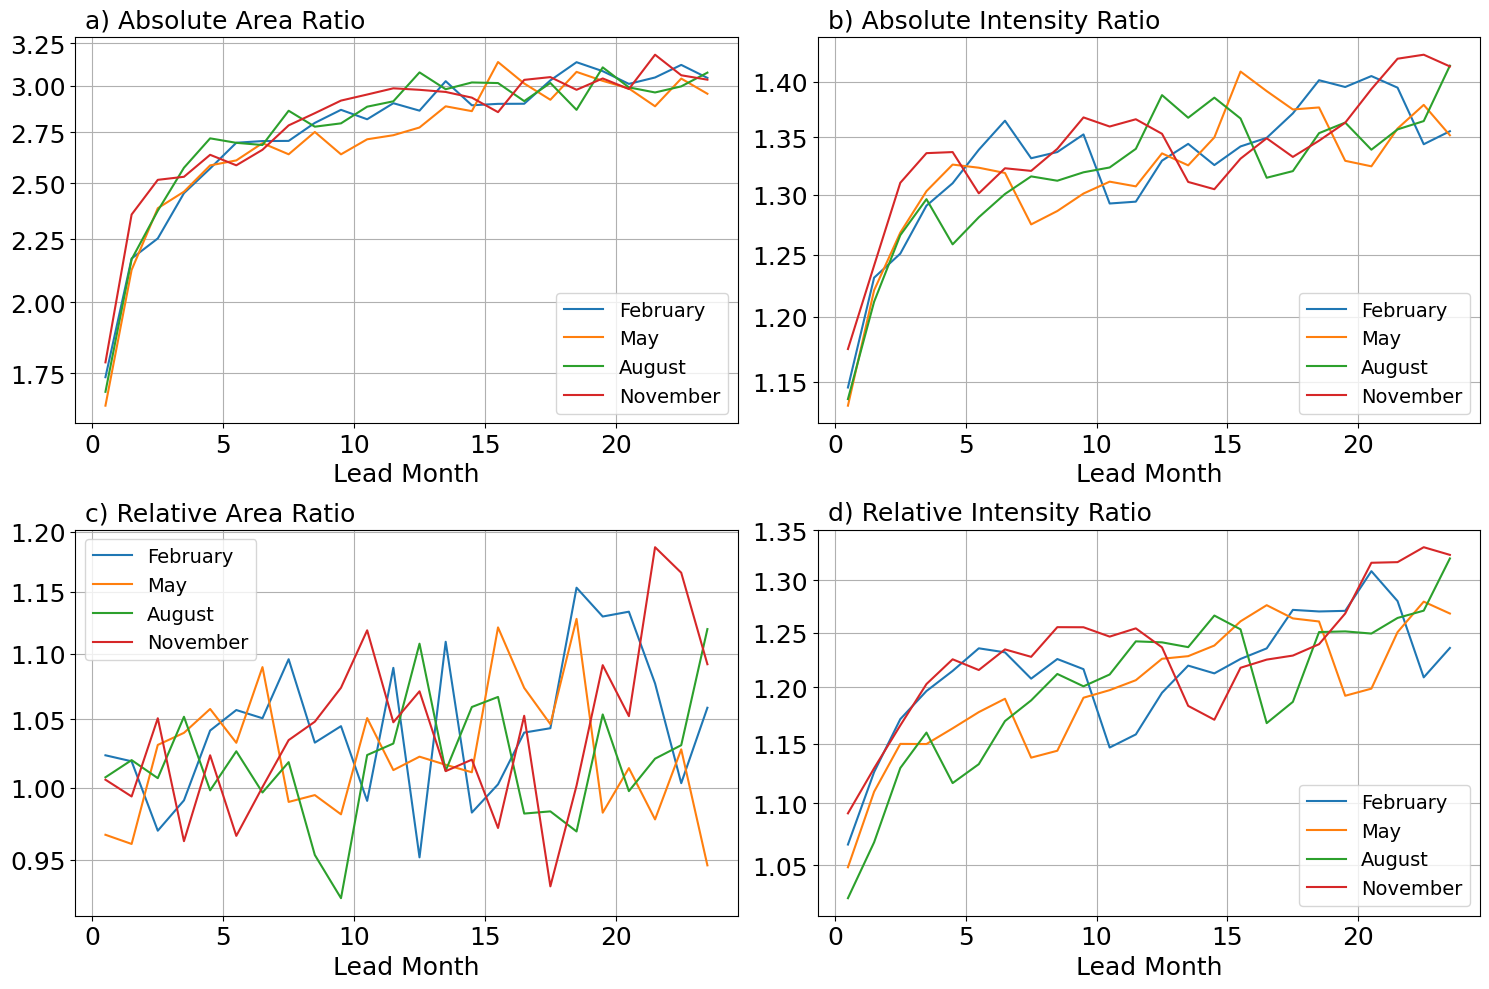

In [4]:
label_pos = 'top'
textsize = 18
cbarsize = 14

colors = plt.cm.tab10
month_names = ['February', 'May', 'August', 'November']
data = [
    np.exp(ds['ABS_LOG_AREA_RATIO']),
    np.exp(ds['ABS_LOG_INTENSITY_50_RATIO']),
    np.exp(ds['LOG_AREA_RATIO']),
    np.exp(ds['LOG_INTENSITY_50_RATIO'])
]
ylabels = ['Area Ratio', 'Intensity Ratio', 'Area Ratio', 'Intensity Ratio']
labels = ['a) Absolute Area Ratio', 'b) Absolute Intensity Ratio', 'c) Relative Area Ratio', 'd) Relative Intensity Ratio']
locs = [4, 4, 2, 4]
ticks = [
    np.linspace(1.75, 3.25, 7),
    np.linspace(1.15, 1.4, 6),
    np.linspace(0.95, 1.2, 6),
    np.linspace(1.05, 1.35, 7)
]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    for j in range(4):
        im0 = ax.plot(np.arange(0, 24)+0.5, data[i].isel(month=j), label=month_names[j], c=colors(j))
    ax.set_yscale('log')
    ax.set_yticks(ticks[i], labels=[f'{t:.2f}' for t in ticks[i]])
    ax.set_xlabel('Lead Month', fontsize=textsize)
    ax.tick_params(labelsize=textsize)
    ax.grid()
    label_ax(ax, labels[i], 'top', fontsize=textsize)
    ax.legend(loc=locs[i], fontsize=cbarsize)

plt.tight_layout()
plt.show()